In [2]:
import os
from Transformer_model import *

/home/qopt/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
I0000 00:00:1749195016.447025 2608867 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13709 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
N_drive = '/mnt/n/SCI-NBI-quantop-data/data/gwd/Experimental Data/atoms/2025/2025-05-28 - Chistian Jun ML DAQ'
Git_Folder = os.path.dirname(os.path.dirname(os.getcwd()))
dataset_folder = os.path.join(N_drive, 'ML_datasets')
tdms_files = ['Data_diffent_process_params_2025_06_03.tdms','Data_processes_2025_06_03.tdms']


In [4]:
# train_model(
#     train_dataset = tf.data.Dataset.load(os.path.join(dataset_folder, f"many_train_{type_data[i]}_{os.path.split(tdms_file)[-1].split("_2025")[0]}")).take(1),#train_dataset,
#     val_dataset = tf.data.Dataset.load(os.path.join(dataset_folder, f"many_val_{type_data[i]}_{os.path.split(tdms_file)[-1].split("_2025")[0]}")).take(1),#val_dataset,
                
# )

/home/qopt/miniconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:908: UserWarning: You are using a softmax over axis 3 of a tensor of shape (5000, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
I0000 00:00:1749195051.946322 2609039 service.cc:152] XLA service 0x780cb4002df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749195051.946359 2609039 service.cc:160]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2025-06-06 09:30:52.069387: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749195052.534574 2609039 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-06 09:30:53.894518: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] p

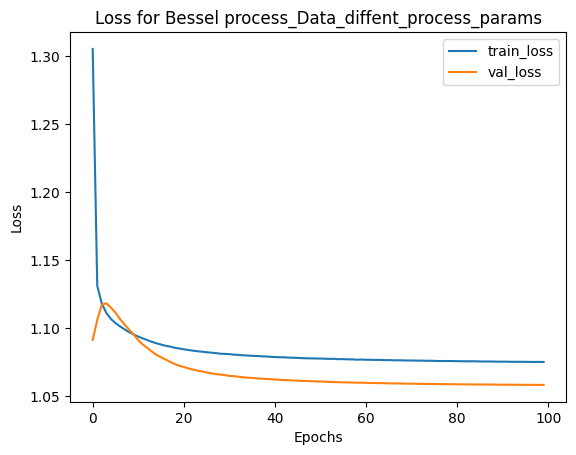

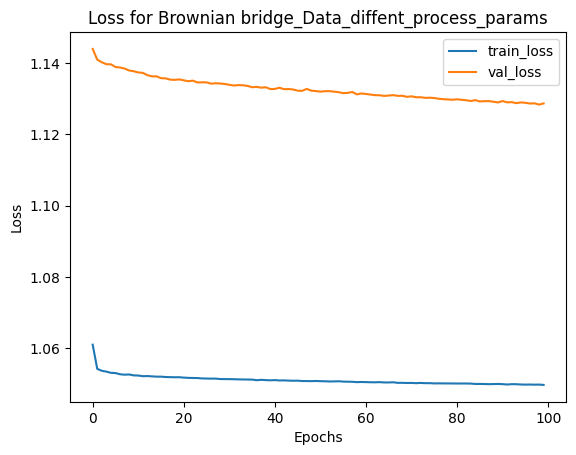

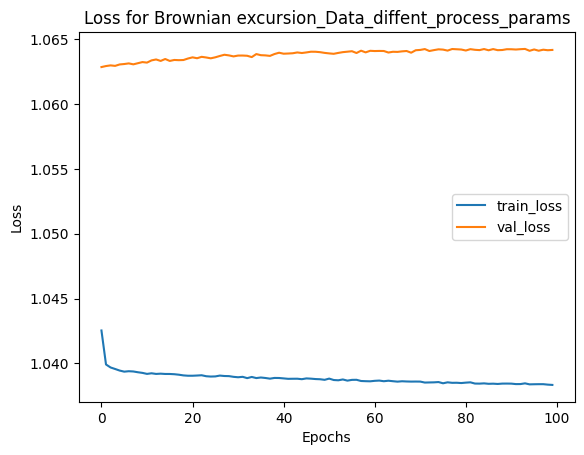

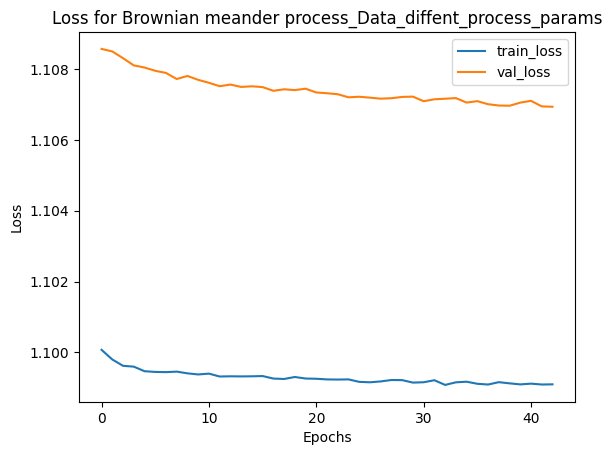

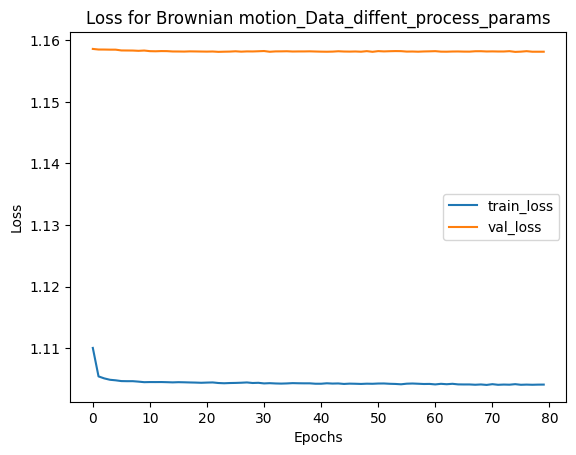

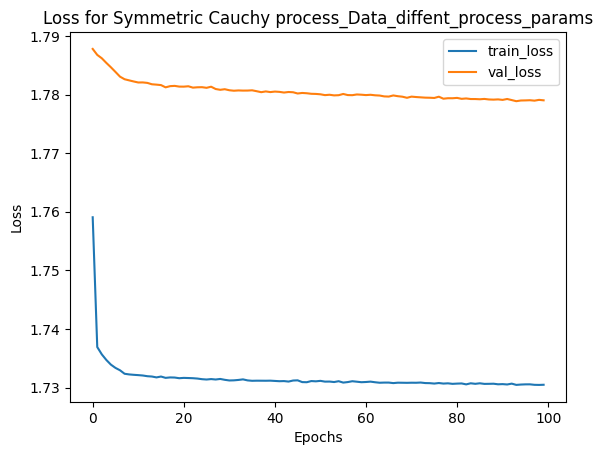

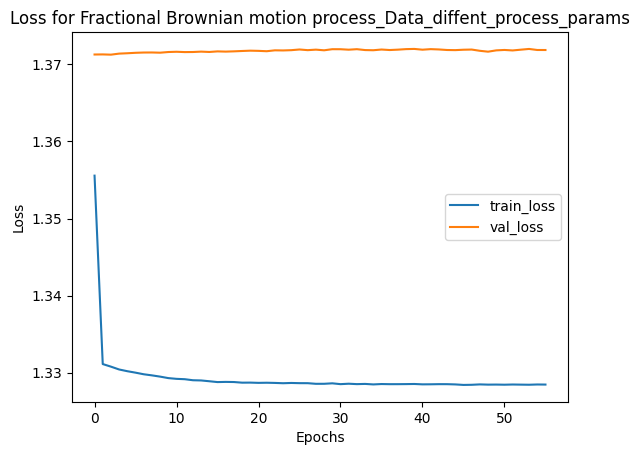

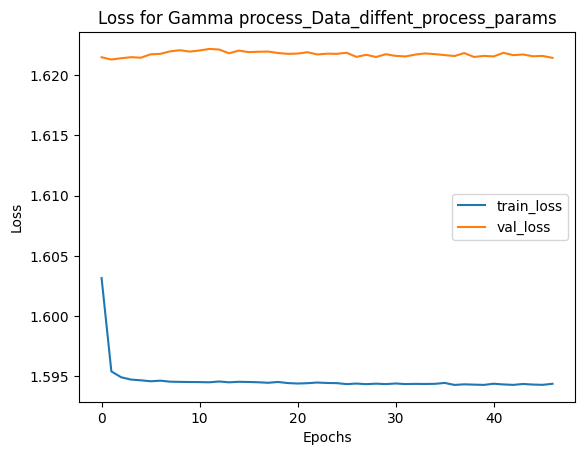

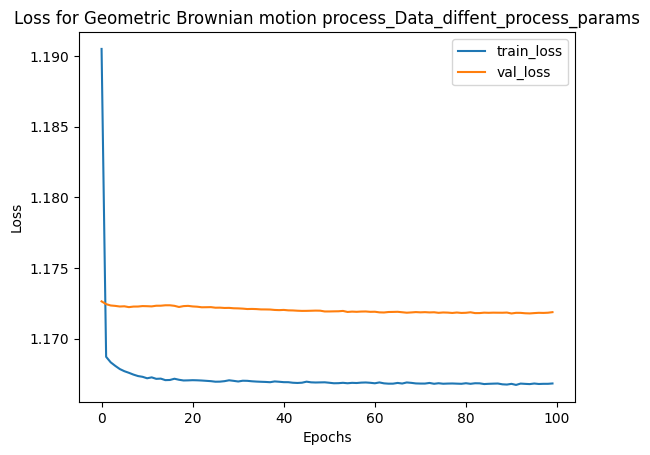

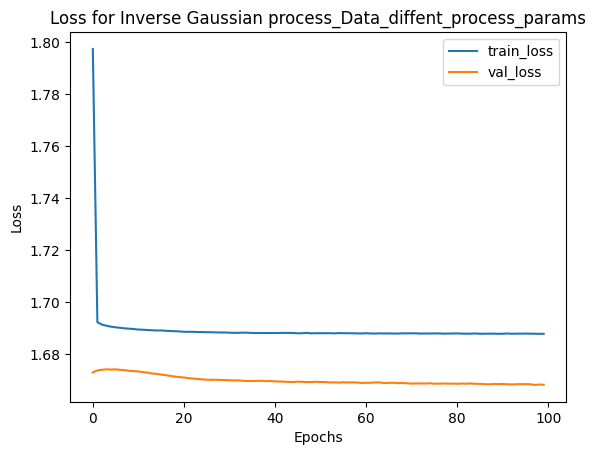

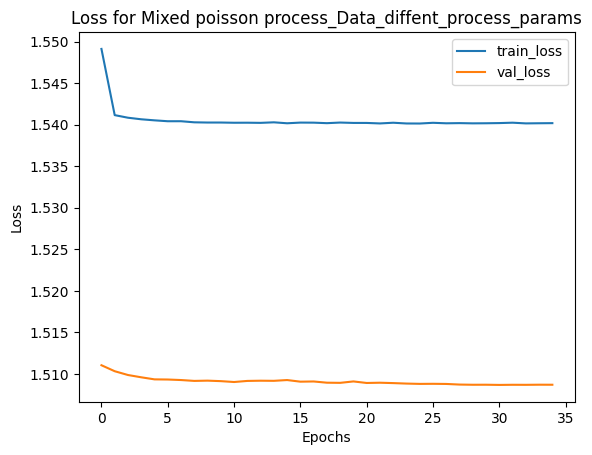

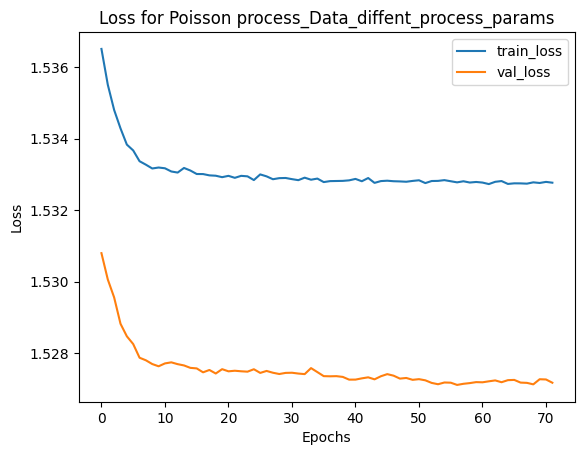

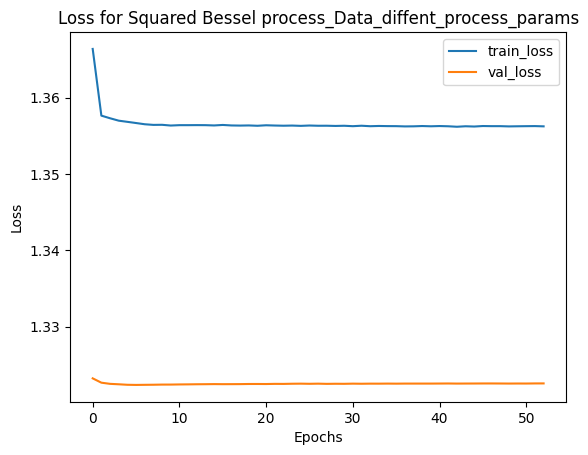

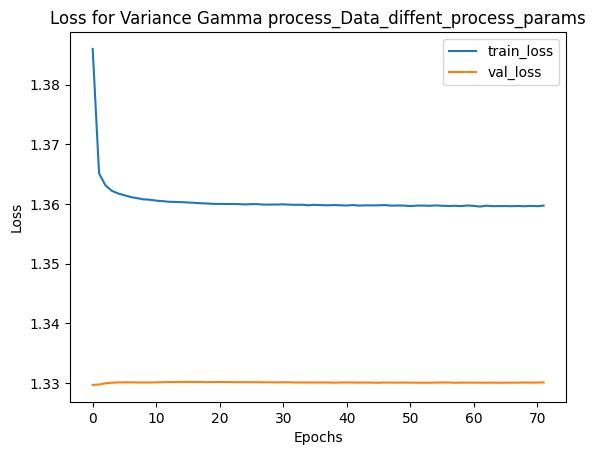

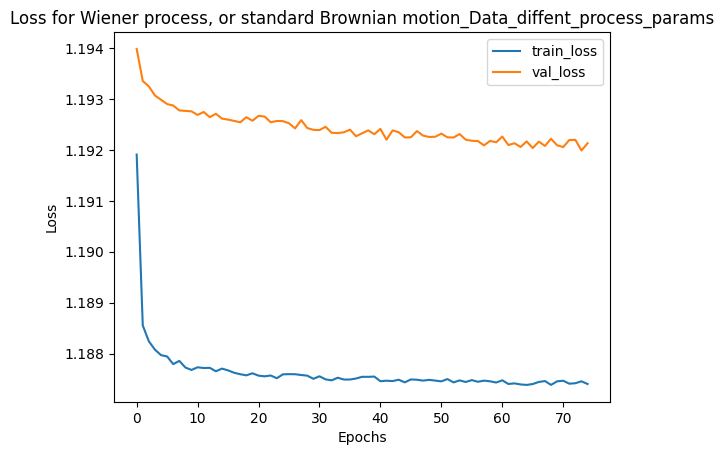

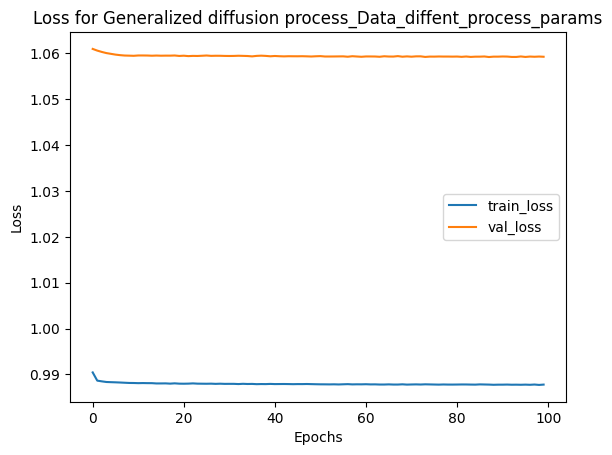

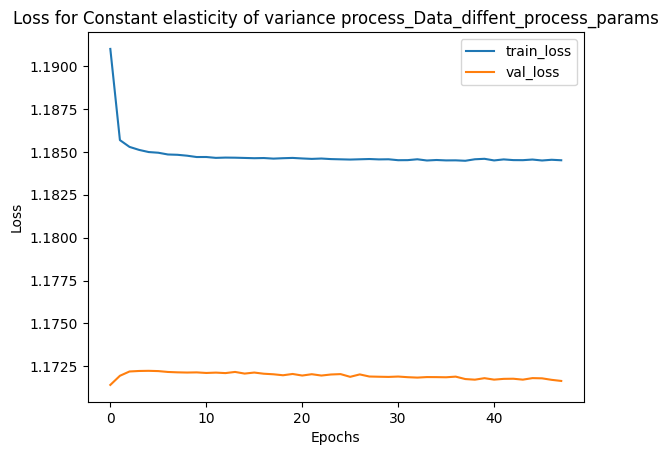

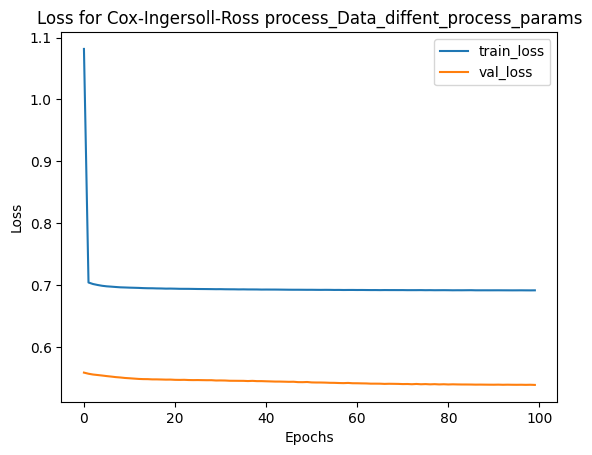

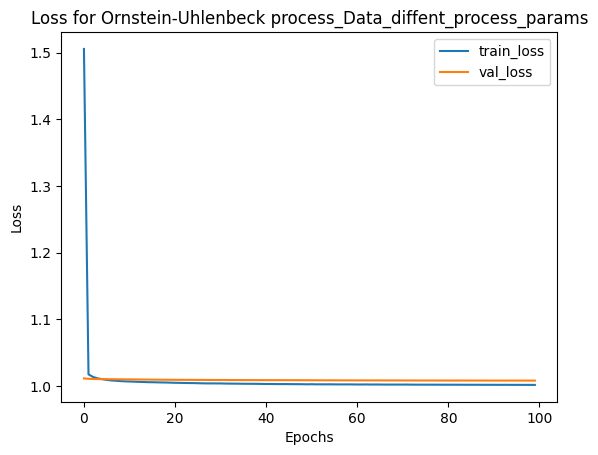

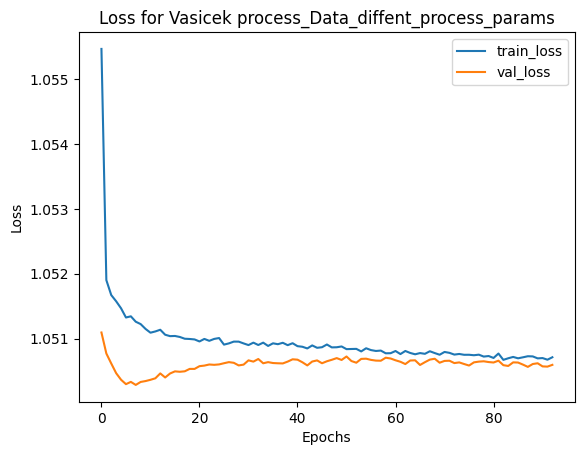

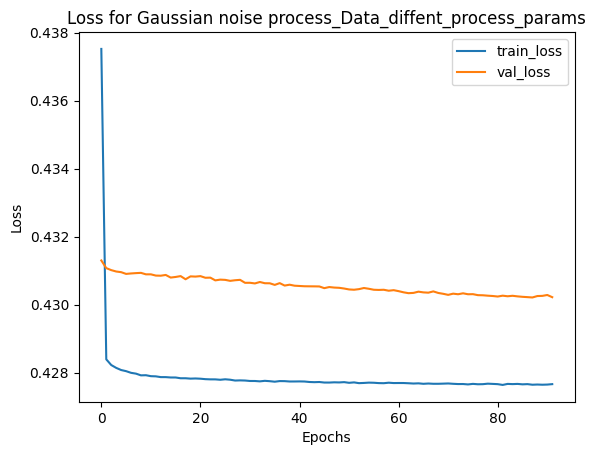

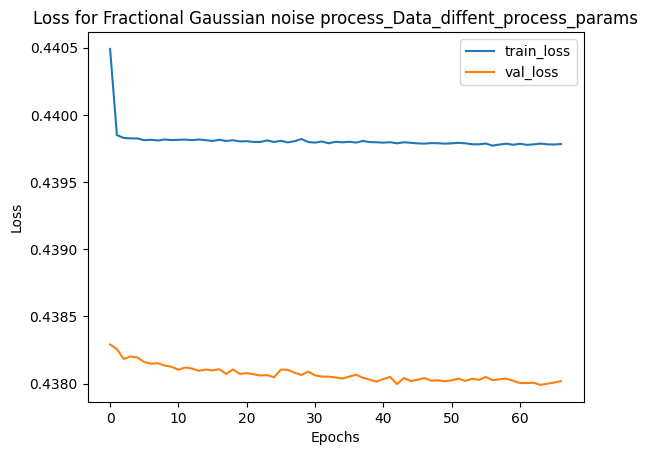

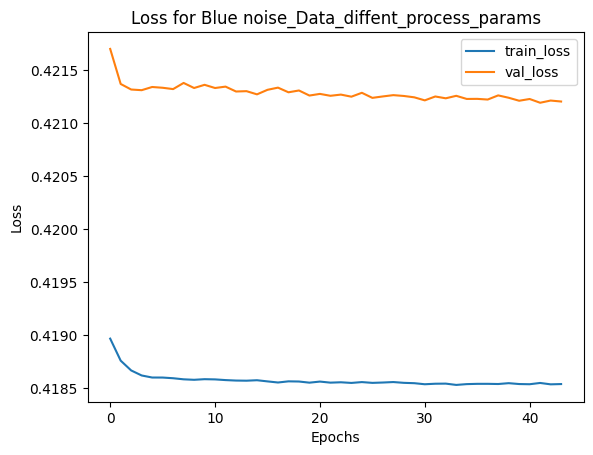

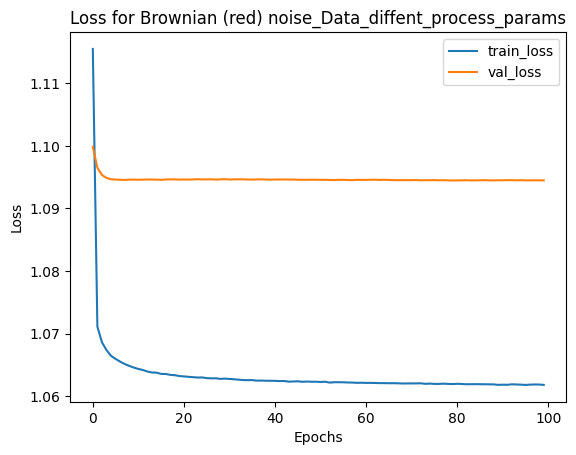

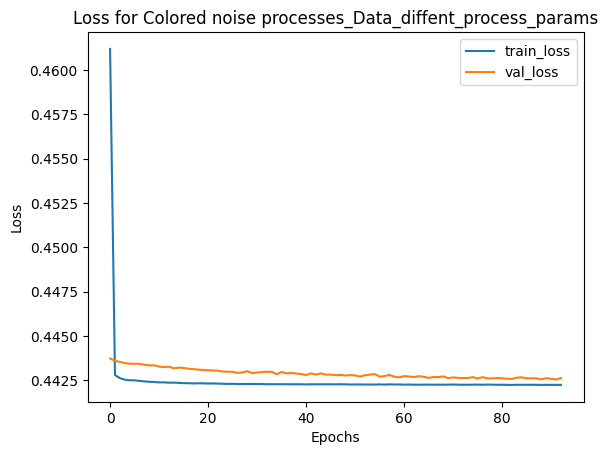

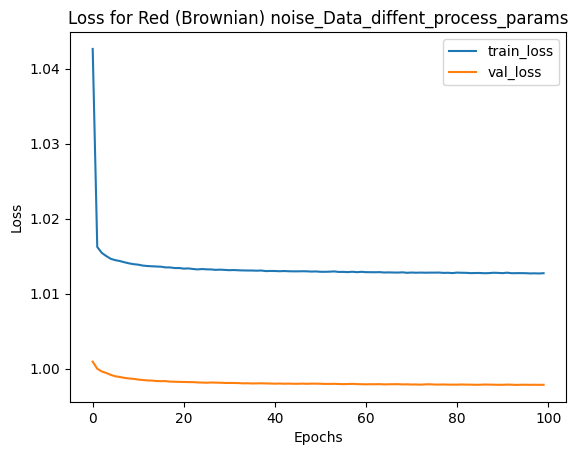

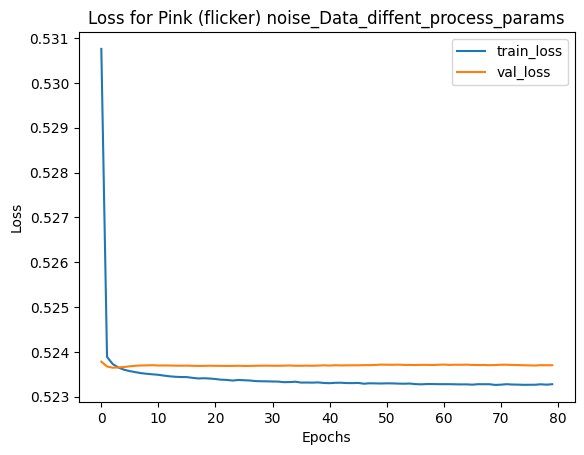

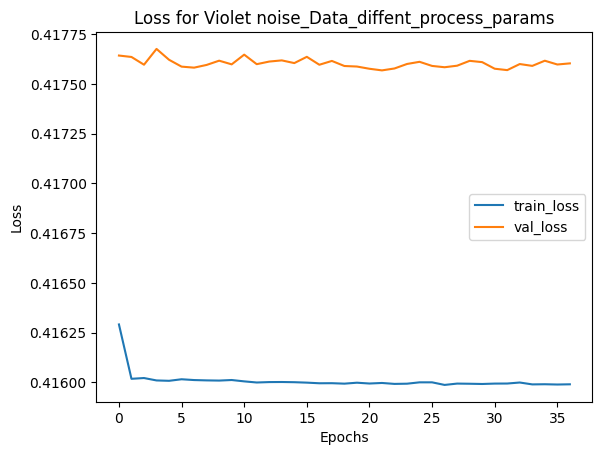

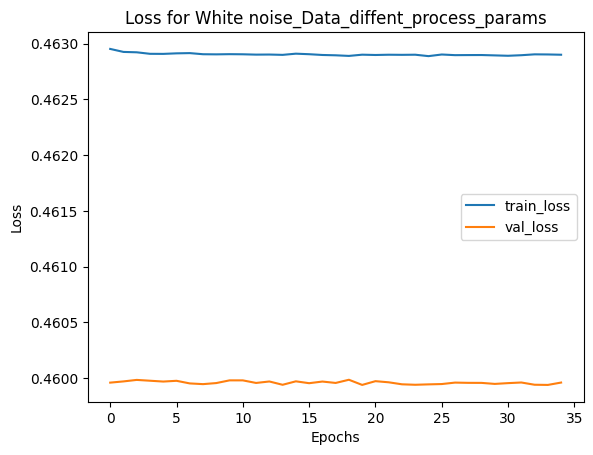

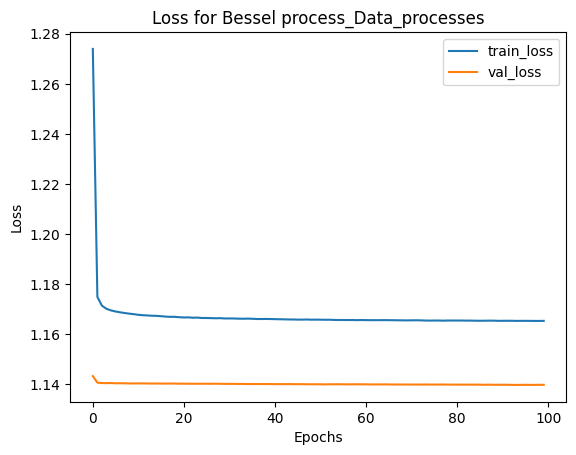

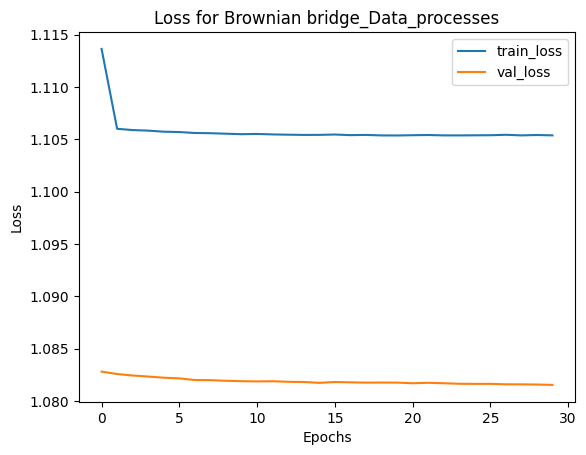

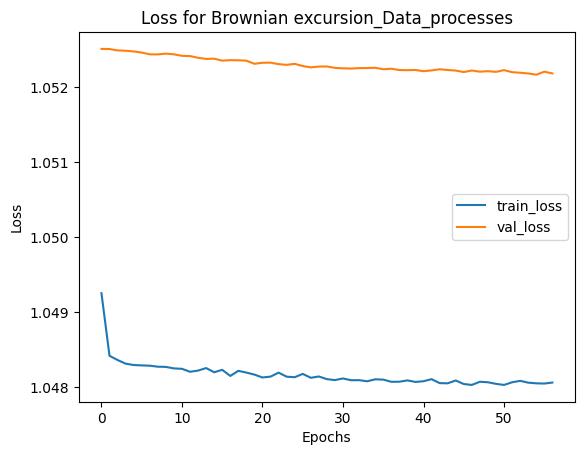

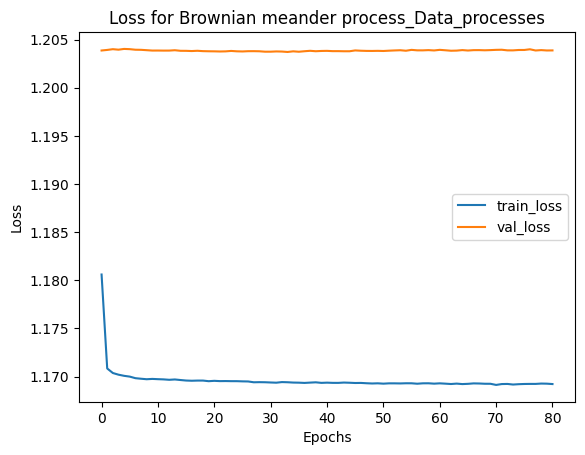

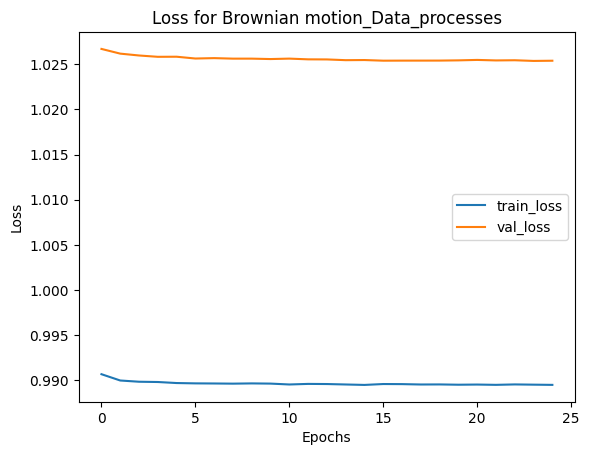

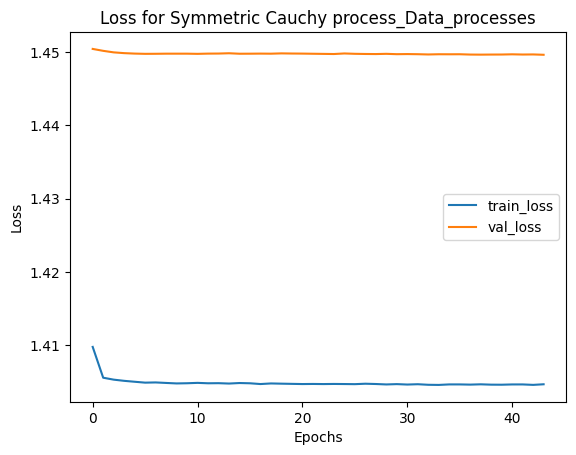

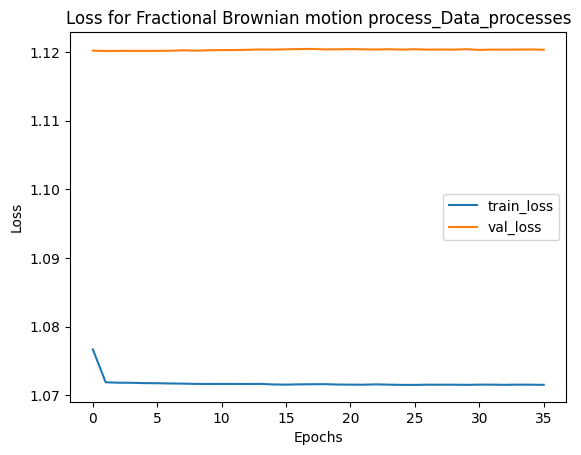

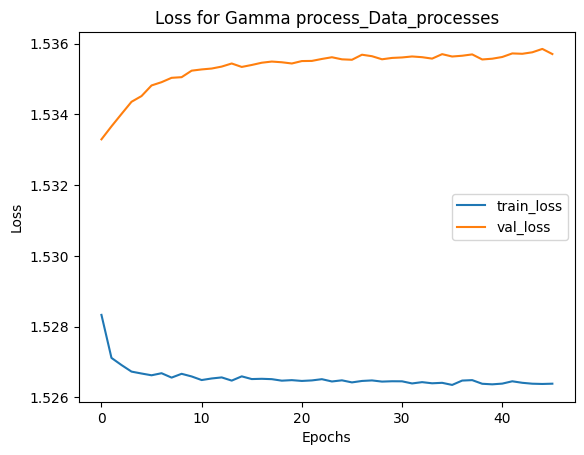

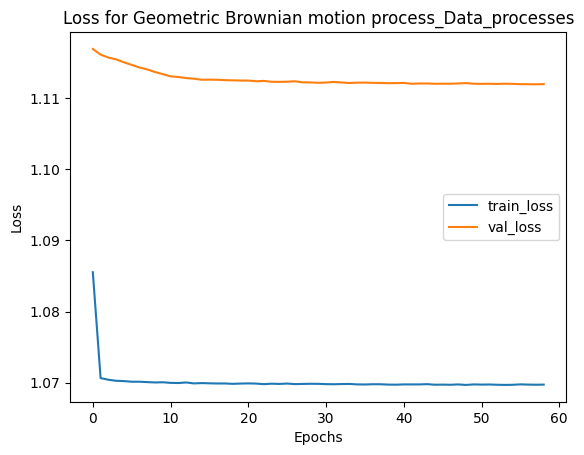

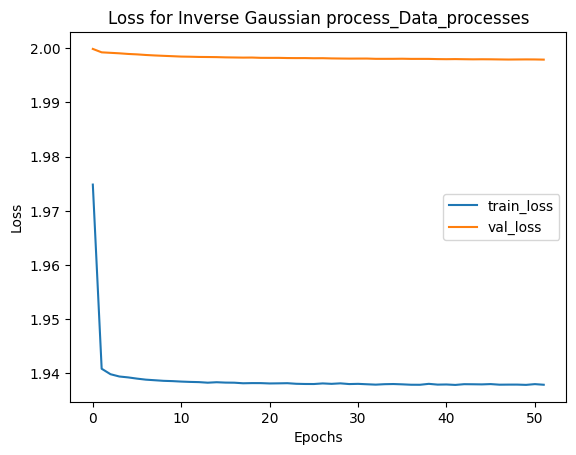

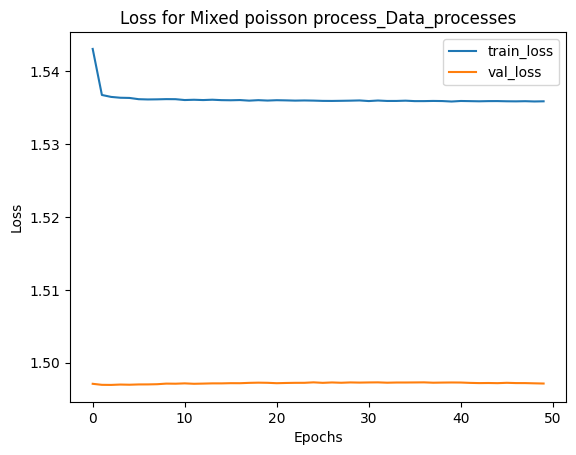

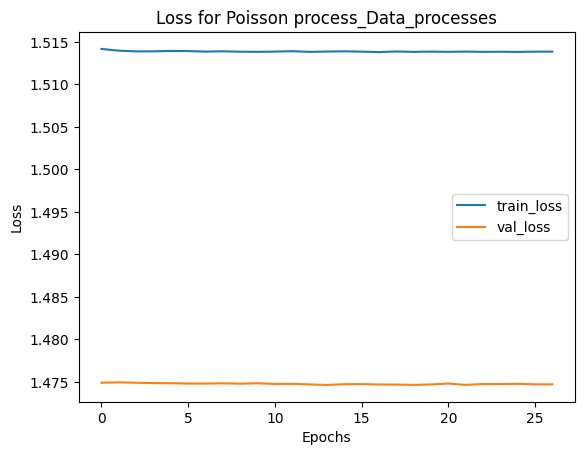

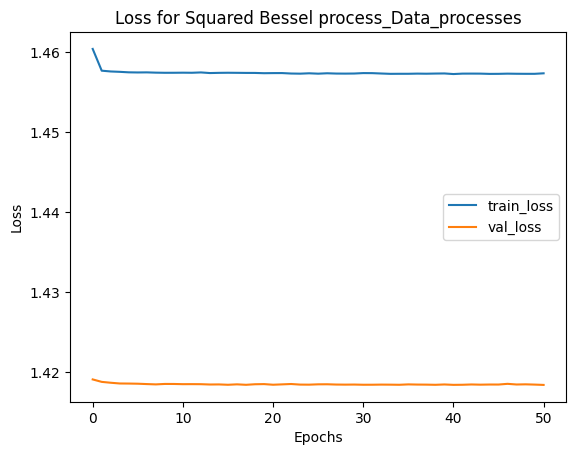

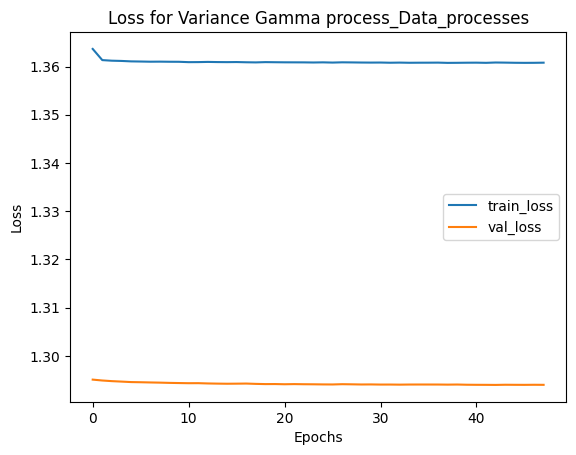

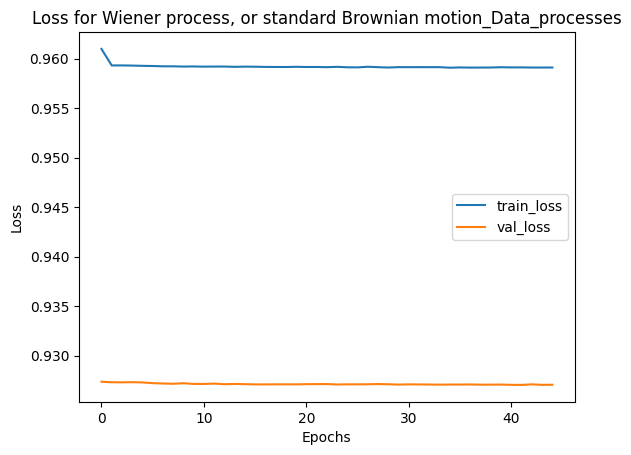

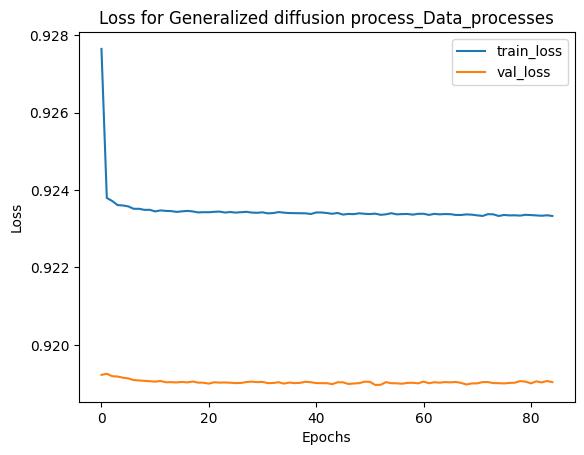

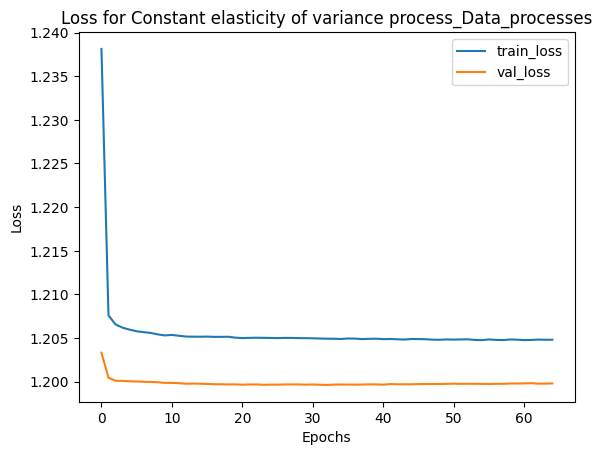

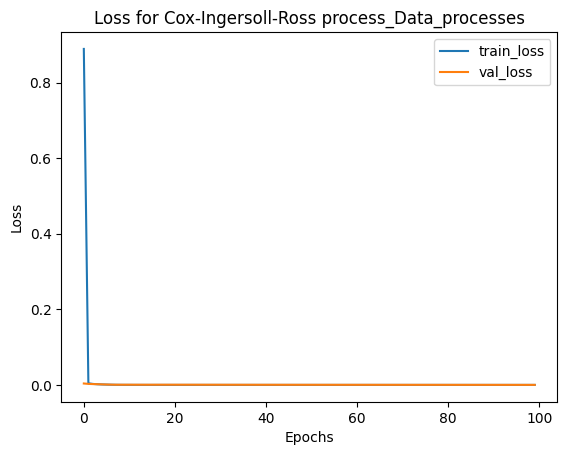

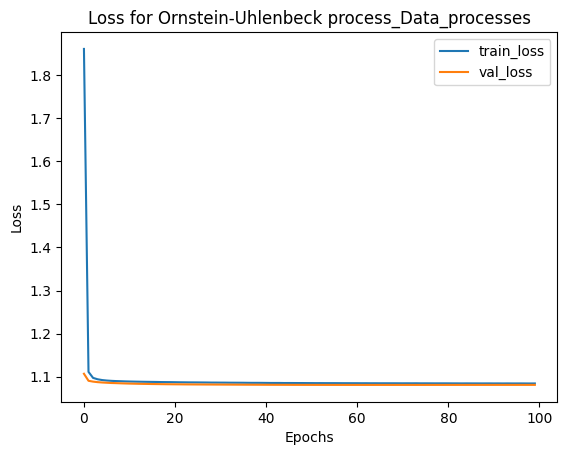

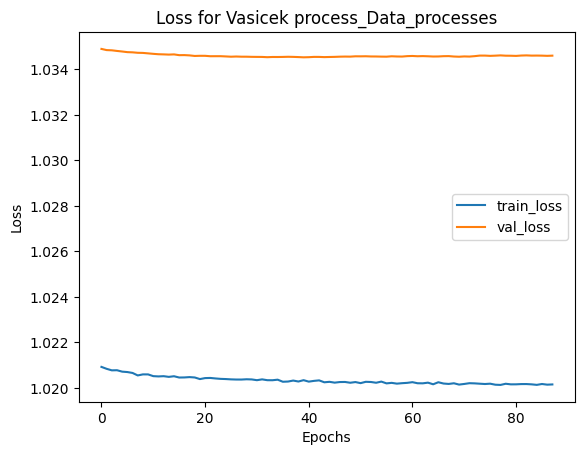

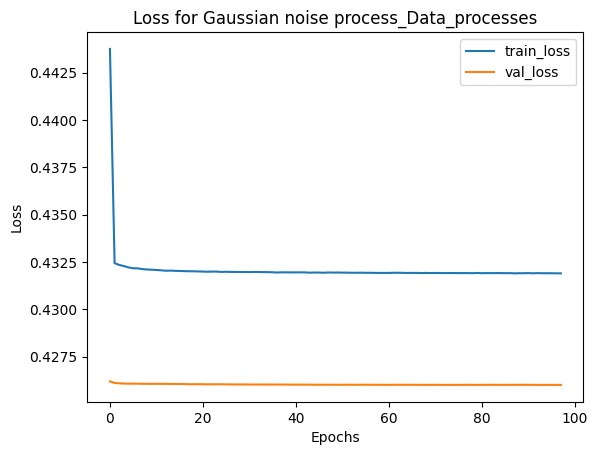

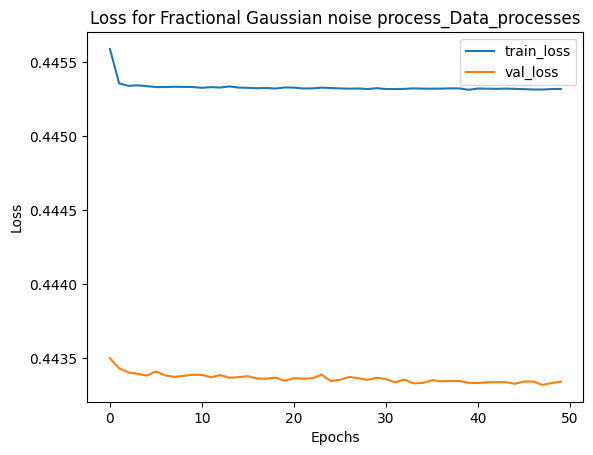

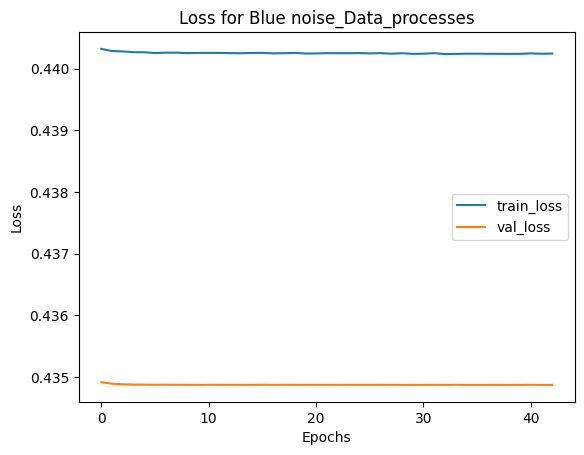

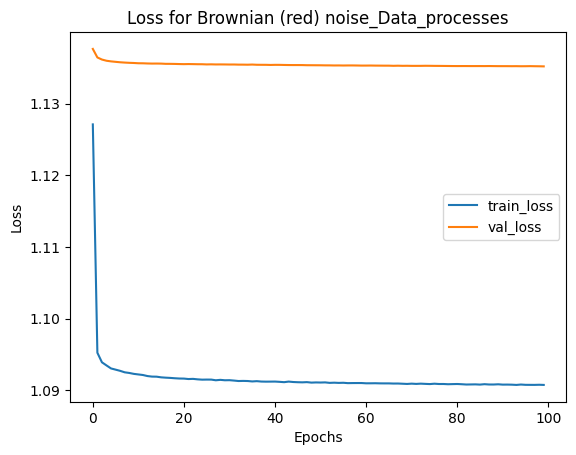

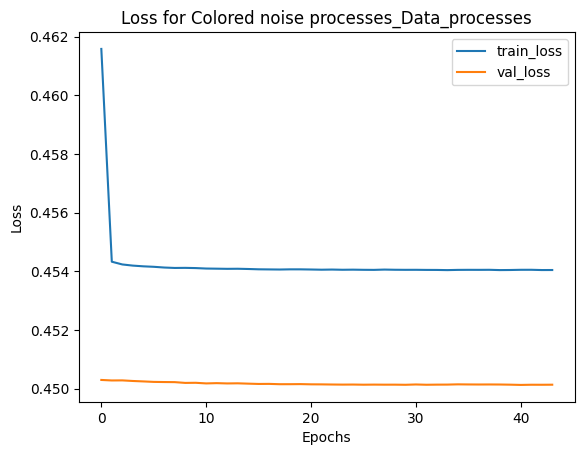

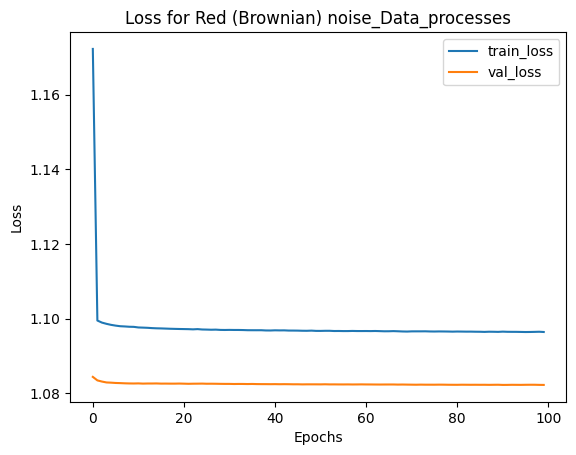

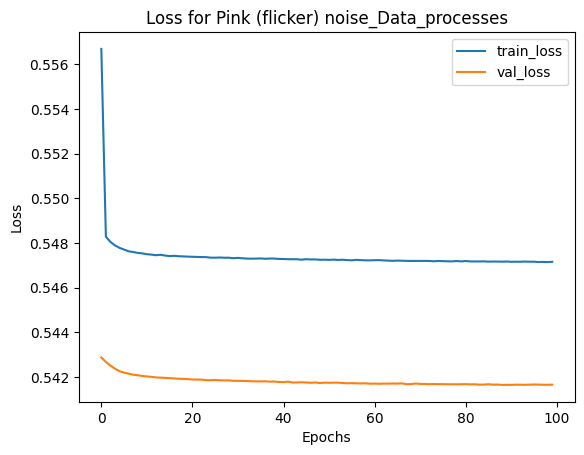

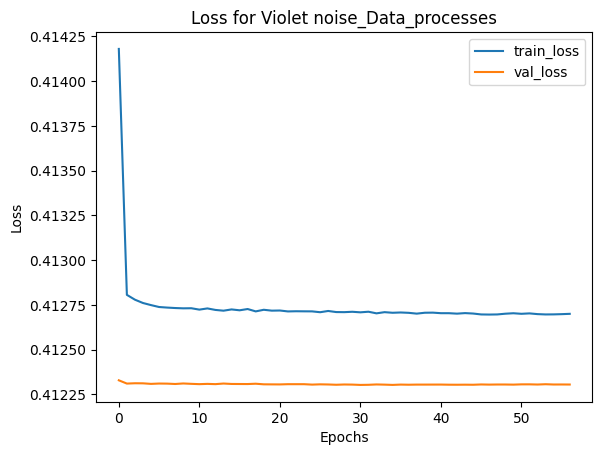

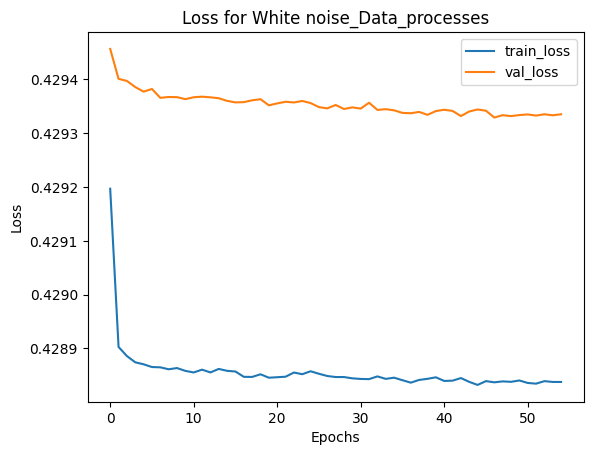

In [5]:
for file in tdms_files:
    train_lots_models(
        tdms_file = os.path.join(N_drive, file),
        Git_Folder = Git_Folder,
        dataset_folder = dataset_folder
    )

In [6]:
# import os
# from Transformer_model import *
# N_drive = '/mnt/n/SCI-NBI-quantop-data/data/gwd/Experimental Data/atoms/2025/2025-05-28 - Chistian Jun ML DAQ'
# Git_Folder = os.path.dirname(os.path.dirname(os.getcwd()))
# dataset_folder = os.path.join(N_drive, 'ML_datasets')
# tdms_files = ['Data_diffent_process_params_2025_06_03.tdms','Data_processes_2025_06_03.tdms']


In [7]:
dataset_folder = os.path.join(N_drive, 'ML_datasets')
datasets = os.listdir(dataset_folder)
trainsets = [x for x in datasets if x.startswith("train")]
valsets = [x for x in datasets if x.startswith("val")]
# testsets = [x for x in datasets if x.startswith("test")]
names = [x.removeprefix("val_").removesuffix("_2025_06_03") for x in valsets]

In [8]:
# TESTtrainsets = [x for x in datasets if x.startswith("many_train_Or")][1]
# TESTvalsets = [x for x in datasets if x.startswith("many_val_Or")][1]


In [9]:
# "\\unicph.domain\groupdir\SCI-NBI-quantop-data\data\gwd\Experimental Data\atoms\2025\2025-05-28 - Chistian Jun ML DAQ\ML_datasets\Ornstein-Uhlenbeck process_Data_diffent_process_params"

In [10]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np

# class SinePositionalEncoding(layers.Layer):
#     def __init__(self, sequence_length, d_model):
#         super().__init__()
#         self.sequence_length = sequence_length
#         self.d_model = d_model

#     def get_angles(self, pos, i):
#         angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(self.d_model))
#         return pos * angle_rates

#     def call(self, inputs):
#         # inputs shape: (batch, seq_len, d_model)
#         pos = np.arange(self.sequence_length)[:, np.newaxis]
#         i = np.arange(self.d_model)[np.newaxis, :]
#         angle_rads = self.get_angles(pos, i)
#         # apply sin to even indices, cos to odd indices
#         angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
#         angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
#         pos_encoding = angle_rads[np.newaxis, ...]  # (1, seq_len, d_model)
#         return inputs + tf.cast(pos_encoding, tf.float32)


In [11]:
# from keras_hub.layers import TransformerEncoder, TransformerDecoder


In [12]:
# # Hyperparameters
# input_seq_len = 5000
# output_seq_len = 5000
# num_features = 1

# d_model = 64
# num_heads = 4
# ff_dim = 128
# num_layers = 1

# # Encoder
# encoder_inputs = keras.Input(shape=(input_seq_len, num_features), name="encoder_inputs")
# x = layers.Dense(d_model)(encoder_inputs)  # Project features to d_model
# x = SinePositionalEncoding(input_seq_len, d_model)(x)

# for _ in range(num_layers):
#     x = TransformerEncoder(
#         intermediate_dim=ff_dim,
#         num_heads=num_heads,
#         dropout=0.1
#     )(x)
# encoder_outputs = x

# # Decoder
# decoder_inputs = keras.Input(shape=(output_seq_len, num_features), name="decoder_inputs")
# y = layers.Dense(d_model)(decoder_inputs)
# y = SinePositionalEncoding(output_seq_len, d_model)(y)

# for _ in range(num_layers):
#     y = TransformerDecoder(
#         intermediate_dim=ff_dim,
#         num_heads=num_heads,
#         dropout=0.1
#     )(y, encoder_outputs)
# decoder_outputs = y

# # Output projection
# outputs = layers.Dense(num_features)(decoder_outputs)

# # Model
# model = keras.Model([encoder_inputs, decoder_inputs], outputs)
# # model.compile(optimizer="adam", loss="mse")
# # model.summary()


In [13]:
# train_model(        
#         train_dataset = tf.data.Dataset.load(
#             os.path.join(dataset_folder, TESTtrainsets)
#         ),
#         val_dataset = tf.data.Dataset.load(
#             os.path.join(dataset_folder, TESTvalsets)
#         ),
#         initial_learning_rate=1e-4,
#         target_learning_rate=1e-4,
#         warmup_steps=2100,
#         decay_steps=2100,
#         batch_size=256,
#         transformer = def_model(
#             EMBED_DIM = 64,          # Projection dimension for time-series features
#             INTERMEDIATE_DIM = 256, #128  # Transformer feedforward dimension
#             NUM_HEADS = 4  
#         )
#         # transformer = model
#     )

In [14]:
# train_model(        
#         train_dataset = tf.data.Dataset.load(
#             os.path.join(dataset_folder, TESTtrainsets)
#         ),
#         val_dataset = tf.data.Dataset.load(
#             os.path.join(dataset_folder, TESTvalsets)
#         ),
#         initial_learning_rate=1e-4,
#         target_learning_rate=1e-5,
#         warmup_steps=2100,
#         decay_steps=2100,
#         batch_size=10,
#         transformer = def_model(
#             EMBED_DIM = 64,          # Projection dimension for time-series features
#             INTERMEDIATE_DIM = 256, #128  # Transformer feedforward dimension
#             NUM_HEADS = 4  
#         )
#         # transformer = model
#     )

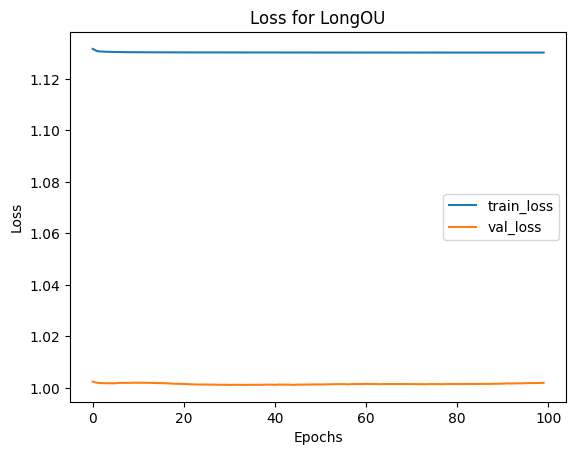

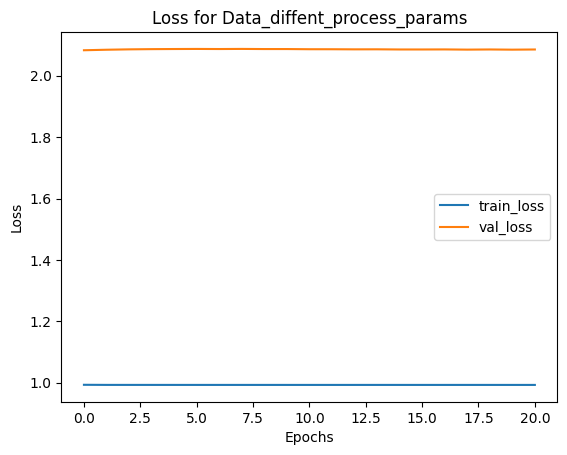

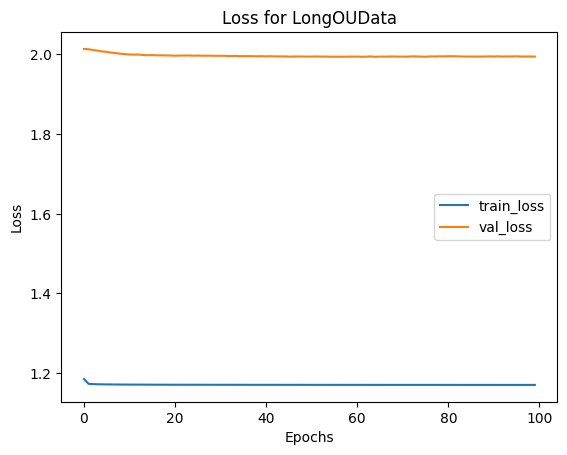

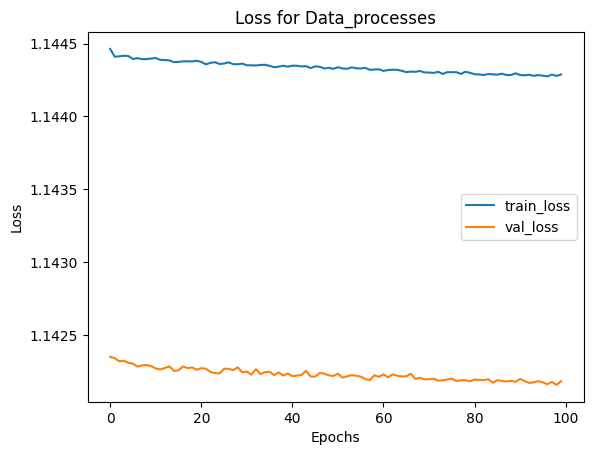

In [15]:
for i in range(len(trainsets)):
    train_model(
        train_dataset = tf.data.Dataset.load(
            os.path.join(dataset_folder, trainsets[i])
        ),
        val_dataset = tf.data.Dataset.load(
            os.path.join(dataset_folder, valsets[i])
        ),
        save_path = os.path.join(Git_Folder, "Python", 'Atomspc', "Transformer_models", f"model_{names[i]}.keras"),
        pickle_path = os.path.join(dataset_folder, f"history_{names[i]}.pkl"),
        plt_path = os.path.join(Git_Folder, "Python", 'Atomspc', "Training_hist", f"loss_hist_{names[i]}.svg"),
        type_model = names[i] 
    )

In [16]:
# train_lots_models(tdms_file, Git_Folder, dataset_folder)